In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf

Create a data frame with a range of discount rates

In [2]:
dfi = pd.DataFrame(data=np.arange(0,45,0.25) , columns=['discount_rate'])
print(dfi.head())
print(dfi.tail())

   discount_rate
0           0.00
1           0.25
2           0.50
3           0.75
4           1.00
     discount_rate
175          43.75
176          44.00
177          44.25
178          44.50
179          44.75


Create a function for calculating NPV

In [3]:
def Npv(r):
    return npf.npv(r*0.01, cash_flows)

Create some lists with cash flows

In [4]:
#cash_flows = [-145, 100, 100, 100, 100, -275]
#cash_flows = [110, -121]
#cash_flows = [-120000, 30000, 60000, 50000, 40000, 180000]
cash_flows = [-1000, 73.75, 73.75, 73.75, 73.75, 1073.75]
#cash_flows = [-500, 30,50,-10,20,-5]

Npv(10)
interest = 7.375
print("NPV: {}".format(round(Npv(interest),2)))

NPV: 0.0


In [5]:
dfi = dfi.assign(NPV = dfi['discount_rate'].apply(Npv))
dfi = dfi.set_index('discount_rate')
print(dfi.head())

                      NPV
discount_rate            
0.00           368.750000
0.25           353.593633
0.50           338.653310
0.75           323.925374
1.00           309.406242


<AxesSubplot:xlabel='discount_rate'>

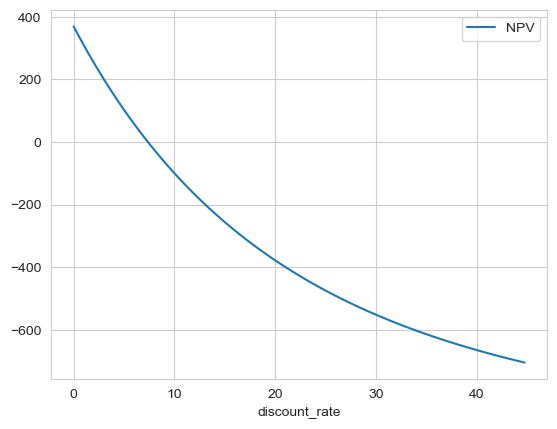

In [6]:
dfi.plot()

Same, but with a fancy line at zero

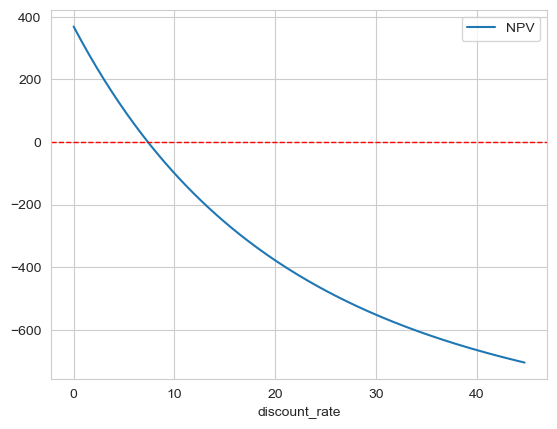

In [7]:
ax = dfi.plot()
ax.axhline(y=0, xmin=dfi.reset_index()['discount_rate'].min(), xmax=dfi.reset_index()['discount_rate'].max(), color='r', linestyle='--', lw=1)

In [8]:
# Calculate IRR
irr = round(npf.irr(cash_flows)*100, 5)
irr

7.375

Based on the IRR formula, IRR is about 7.375 percent


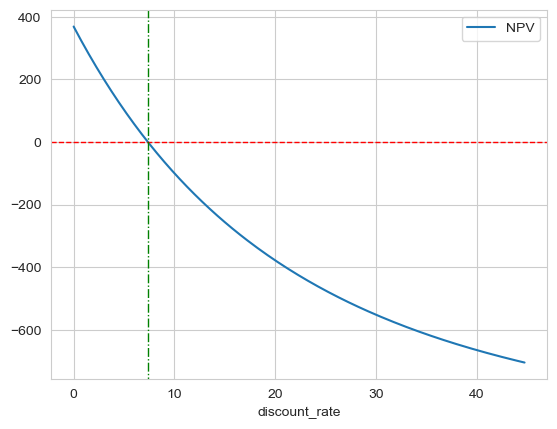

In [9]:
ax = dfi.plot()
ax.axhline(y=0,   xmin=dfi.reset_index()['discount_rate'].min(), xmax=dfi.reset_index()['discount_rate'].max(), color='r', linestyle='--', lw=1)
ax.axvline(x=irr, ymin=dfi['NPV'].min(),           ymax=dfi['NPV'].max(),           color='g', linestyle='-.', lw=1)
print("Based on the IRR formula, IRR is about {} percent".format(irr))